<a href="https://colab.research.google.com/github/AdamTMU/CIND820/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

<ipython-input-2-7e6e89f45796>:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(X[column].median(), inplace=True)
<ipython-input-2-7e6e89f45796>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].median(), inplace=True)


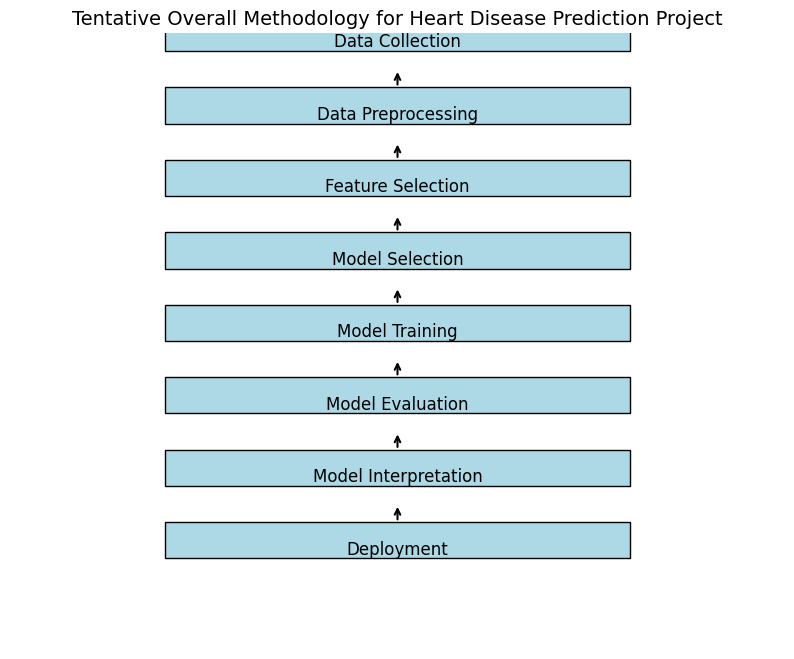

In [2]:
!pip install ucimlrepo

# Import the necessary libraries
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

# Display the first few rows of features and target
print("Features (first few rows):")
print(X.head())

print("\nTarget variable (first few rows):")
print(y.head())

# Descriptive statistics for features
descriptive_stats = X.describe(include='all')
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Correlation matrix for features
correlation_matrix = X.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Additional information for categorical variables
for column in X.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{column}':")
    print(X[column].value_counts())

# Count of unique values for a specific categorical variable (e.g., chest pain type)
categorical_counts = X['cp'].value_counts()  # Example for Chest Pain Type
print("\nCounts of unique values for Chest Pain Type:")
print(categorical_counts)

# Checking for missing values in features
missing_values = X.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Checking for missing values in target
missing_target = y.isnull().sum()
print("\nMissing values in the target variable:")
print(missing_target)

## Impute missing values and fill missing values with the median
for column in X.columns:
    if X[column].isnull().any():
        if X[column].dtype == 'object':
            # Fill categorical with mode
            X[column].fillna(X[column].mode()[0], inplace=True)
        else:
            # Fill numerical with median
            X[column].fillna(X[column].median(), inplace=True)

"Graph"
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Add boxes for each step in the methodology
steps = [
    "Data Collection",
    "Data Preprocessing",
    "Feature Selection",
    "Model Selection",
    "Model Training",
    "Model Evaluation",
    "Model Interpretation",
    "Deployment"
]

y_positions = range(len(steps) * 2, 0, -2)

# Create rectangles for each step
for y, step in zip(y_positions, steps):
    ax.add_patch(mpatches.Rectangle((0.2, y - 0.5), 0.6, 1, fill=True, edgecolor='black', facecolor='lightblue'))
    ax.text(0.5, y - 0.25, step, ha='center', va='center', fontsize=12)

# Add arrows between steps
for start, end in zip(y_positions[:-1], y_positions[1:]):
    ax.annotate('', xy=(0.5, start - 1), xytext=(0.5, end + 0.5),
                arrowprops=dict(arrowstyle='->', lw=1.5))

# Set limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(-1, len(steps) * 2)
ax.axis('off')

# Title
plt.title("Tentative Overall Methodology for Heart Disease Prediction Project", fontsize=14)
plt.show()


In [3]:
# Convert categorical variables to numeric
import pandas as pd
X_encoded = pd.get_dummies(X, drop_first=True)

In [4]:
#Normalize features to ensure that all input features are on a similar scale.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [5]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing values in each column before handling:")
print(missing_values)

# Handle missing values
for column in X.columns:
    if X[column].isnull().any():
        if X[column].dtype == 'object':
            # Fill categorical with mode
            X[column].fillna(X[column].mode()[0], inplace=True)
        else:
            # Fill numerical with median
            X[column].fillna(X[column].median(), inplace=True)

# Verify there are no missing values left
missing_values_after = X.isnull().sum()
print("Missing values in each column after handling:")
print(missing_values_after)

# Convert categorical variables to numeric
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Verify again that there are no NaNs
print("Checking for NaNs in scaled features:")
print(pd.DataFrame(X_scaled).isnull().sum())


Missing values in each column before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
Missing values in each column after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
Checking for NaNs in scaled features:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
# Reload the target variable from the dataset
y = heart_disease.data.targets

# Continue with feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# # Select top features using ANOVA F-test, apply SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # Adjust 'k' as needed
X_selected = selector.fit_transform(X_scaled, y)

# Get feature scores
feature_scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to summarize results
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'F-score': feature_scores,
    'p-value': p_values
})

# Sort features by F-score
feature_importance = feature_importance.sort_values(by='F-score', ascending=False)

# Display the top features
print("Top Features based on ANOVA F-test:")
print(feature_importance.head(5))  # Display top 5 features

# Get the selected feature scores
feature_scores = selector.scores_
print("Feature scores:", feature_scores)

Top Features based on ANOVA F-test:
    Feature    F-score       p-value
12     thal  30.811154  1.785965e-21
11       ca  28.460366  4.882228e-20
9   oldpeak  26.237399  1.190779e-18
7   thalach  19.118957  5.192882e-14
8     exang  19.046004  5.815321e-14
Feature scores: [ 4.89133958  6.24231561 17.64797806  2.03310269  0.86575308  1.97355823
  3.63764689 19.11895677 19.04600412 26.23739863 12.85357852 28.46036635
 30.81115391]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
#Model development
#Splittng the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [19]:
#Model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [20]:
#Model evaluation
#Cross-Validation
from sklearn.model_selection import cross_val_score

logistic_cv_scores = cross_val_score(logistic_model, X_selected, y, cv=10)
tree_cv_scores = cross_val_score(tree_model, X_selected, y, cv=10)
forest_cv_scores = cross_val_score(forest_model, X_selected, y, cv=10)

print("Logistic Regression CV scores:", logistic_cv_scores)
print("Decision Tree CV scores:", tree_cv_scores)
print("Random Forest CV scores:", forest_cv_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression CV scores: [0.61290323 0.61290323 0.58064516 0.76666667 0.56666667 0.46666667
 0.6        0.6        0.56666667 0.66666667]
Decision Tree CV scores: [0.51612903 0.48387097 0.64516129 0.53333333 0.36666667 0.46666667
 0.4        0.46666667 0.5        0.36666667]
Random Forest CV scores: [0.64516129 0.64516129 0.64516129 0.56666667 0.6        0.6
 0.56666667 0.53333333 0.53333333 0.53333333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [26]:
import numpy as np

# CV scores
logistic_scores = np.array([0.61290323, 0.61290323, 0.58064516, 0.76666667, 0.56666667, 0.46666667, 0.6, 0.6, 0.56666667, 0.66666667])
decision_tree_scores = np.array([0.51612903, 0.48387097, 0.64516129, 0.53333333, 0.36666667, 0.46666667, 0.4, 0.46666667, 0.5, 0.36666667])
random_forest_scores = np.array([0.64516129, 0.64516129, 0.64516129, 0.56666667, 0.6, 0.6, 0.56666667, 0.53333333, 0.53333333, 0.53333333])

# Calculate means and standard deviations
logistic_mean = np.mean(logistic_scores)
logistic_std = np.std(logistic_scores)

decision_tree_mean = np.mean(decision_tree_scores)
decision_tree_std = np.std(decision_tree_scores)

random_forest_mean = np.mean(random_forest_scores)
random_forest_std = np.std(random_forest_scores)

# Print the results
print(f"Logistic Regression: Mean = {logistic_mean:.2f}, Std Dev = {logistic_std:.2f}")
print(f"Decision Tree: Mean = {decision_tree_mean:.2f}, Std Dev = {decision_tree_std:.2f}")
print(f"Random Forest: Mean = {random_forest_mean:.2f}, Std Dev = {random_forest_std:.2f}")


Logistic Regression: Mean = 0.60, Std Dev = 0.07
Decision Tree: Mean = 0.47, Std Dev = 0.08
Random Forest: Mean = 0.59, Std Dev = 0.04


In [24]:
#Performance metrics
#Evaluate models using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

model = logistic_model
# Assume y_pred is the predicted values from your model
# Replace y_pred with your actual predictions
y_pred = model.predict(X_test)  # Make sure y_pred is generated from your model

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjusted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Adjusted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Adjusted for multiclass

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.54
Precision: 0.51
Recall: 0.54
F1 Score: 0.52
Confusion Matrix:
[[26  1  2  0  0]
 [ 3  3  3  3  0]
 [ 2  1  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features  # Features DataFrame
y = heart_disease.data.targets    # Target variable

# Handle missing values, encode categorical variables, etc.
# (Assuming preprocessing has been done)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get coefficients
coefficients = model.coef_[0]
features = X_train.columns

# Create a DataFrame to summarize coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the most important variables
print("Most Important Variables from Logistic Regression:")
print(coef_df[['Feature', 'Coefficient', 'Absolute Coefficient']].head(5))


Most Important Variables from Logistic Regression:
   Feature  Coefficient  Absolute Coefficient
11      ca    -1.068271              1.068271
1      sex    -0.581501              0.581501
2       cp    -0.556481              0.556481
12    thal    -0.451207              0.451207
10   slope    -0.443042              0.443042


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
